In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from tmpnn import Regression

In [13]:
x = np.linspace(0, 10, 200).reshape(-1, 1)
y = 1000+10*x
y+=50*(np.random.rand(*y.shape) - 0.5)

x_test = np.linspace(-10, 20, 500).reshape(-1, 1)
y_test = 1000+10*x_test
y_test+=50*(np.random.rand(*y_test.shape) - 0.5)

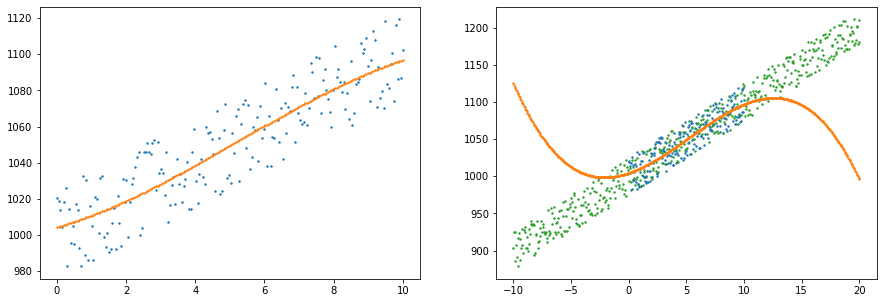

In [14]:
poly_pipe = Pipeline(steps=[('scaler', StandardScaler()),
                            ('preprocessor', PolynomialFeatures(degree=3, include_bias=False)),
                            ('estimator', LinearRegression(normalize=True))
                           ])

poly_pipe.fit(x, y)
y_pred = poly_pipe.predict(x)
y_test_pred = poly_pipe.predict(x_test)

_, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].scatter(x, y, s=2)
axs[0].scatter(x, y_pred, s=2)
axs[1].scatter(x_test, y_test, s=2, c='tab:green')
axs[1].scatter(x, y, s=2, c='tab:blue')
axs[1].scatter(x_test, y_test_pred, s=2, c='tab:orange')


In [15]:
model = Regression(num_features=1, num_targets=1, order=3, steps=10)
model.fit(x, y, epochs=1000, verbose=2)
model.set_learning_rate(0.5e-4)
model.fit(x, y, epochs=500, verbose=2)
ytm_pred = model.predict(x)
ytm_test_pred = model.predict(x_test)

Epoch 1/1000
1/1 - 0s - loss: 0.2977
Epoch 2/1000
1/1 - 0s - loss: 0.2742
Epoch 3/1000
1/1 - 0s - loss: 0.2513
Epoch 4/1000
1/1 - 0s - loss: 0.2288
Epoch 5/1000
1/1 - 0s - loss: 0.2067
Epoch 6/1000
1/1 - 0s - loss: 0.1851
Epoch 7/1000
1/1 - 0s - loss: 0.1639
Epoch 8/1000
1/1 - 0s - loss: 0.1433
Epoch 9/1000
1/1 - 0s - loss: 0.1233
Epoch 10/1000
1/1 - 0s - loss: 0.1041
Epoch 11/1000
1/1 - 0s - loss: 0.0858
Epoch 12/1000
1/1 - 0s - loss: 0.0687
Epoch 13/1000
1/1 - 0s - loss: 0.0533
Epoch 14/1000
1/1 - 0s - loss: 0.0405
Epoch 15/1000
1/1 - 0s - loss: 0.0319
Epoch 16/1000
1/1 - 0s - loss: 0.0291
Epoch 17/1000
1/1 - 0s - loss: 0.0327
Epoch 18/1000
1/1 - 0s - loss: 0.0384
Epoch 19/1000
1/1 - 0s - loss: 0.0423
Epoch 20/1000
1/1 - 0s - loss: 0.0430
Epoch 21/1000
1/1 - 0s - loss: 0.0406
Epoch 22/1000
1/1 - 0s - loss: 0.0363
Epoch 23/1000
1/1 - 0s - loss: 0.0315
Epoch 24/1000
1/1 - 0s - loss: 0.0272
Epoch 25/1000
1/1 - 0s - loss: 0.0241
Epoch 26/1000
1/1 - 0s - loss: 0.0220
Epoch 27/1000
1/1 - 0

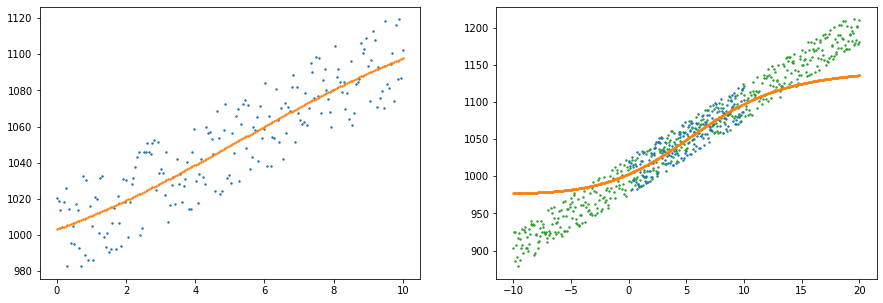

In [16]:
_, axs = plt.subplots(1, 2, figsize=(15,5))
axs[0].scatter(x, y, s=2)
axs[0].scatter(x, ytm_pred, s=2)
axs[1].scatter(x_test, y_test, s=2, c='tab:green')
axs[1].scatter(x, y, s=2, c='tab:blue')
axs[1].scatter(x_test, ytm_test_pred, s=2, c='tab:orange')